In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm, datasets

In [3]:
dir = "F:\Thesis Material\Thesisdataset.xlsx"
dataset = pd.read_excel(dir)

In [4]:
inputs = dataset.drop(('1. Age in years'), axis = 'columns')
inputs.head()
df = inputs.drop('8. Family Income', axis = 'columns')

In [6]:
le_Gender = LabelEncoder()
le_Placeofresidents = LabelEncoder()
le_Race = LabelEncoder()
le_EducationalLevel = LabelEncoder()
le_OccupationalStatus = LabelEncoder()
le_MaritalStatus = LabelEncoder()
le_Agegroup = LabelEncoder()
le_Depression = LabelEncoder()
le_Stress = LabelEncoder()
le_Anxiety = LabelEncoder()

In [7]:
df['Gndr'] = le_Gender.fit_transform(df['Gender'])
df['Resident'] = le_Placeofresidents.fit_transform(df['Placeofresidents'])
df['RaceStat'] = le_Race.fit_transform(df['Race'])
df['Education'] = le_EducationalLevel.fit_transform(df['EducationalLevel'])
df['Occupation'] = le_OccupationalStatus.fit_transform(df['OccupationalStatus'])
df['Marriage'] = le_MaritalStatus.fit_transform(df['MaritalStatus'])
df['Age'] = le_Agegroup.fit_transform(df['Agegroup'])
df['Depressed'] = le_Depression.fit_transform(df['Depression'])
df['Stressed'] = le_Stress.fit_transform(df['Stress'])
df['Anex'] = le_Anxiety.fit_transform(df['Anxiety'])

In [8]:
fdf = df.drop(['Gender', 'Placeofresidents', 'Race', 'EducationalLevel', 'OccupationalStatus', 'MaritalStatus', 'Agegroup', 'Depression', 'Stress', 'Anxiety'], axis='columns')
fdf.head()

,1stquestion,2ndquestion,3rdquestion,4thquestion,5thquestion,6thquestion,7thquestion,8thquestion,9thquestion,10thquestion,...,Gndr,Resident,RaceStat,Education,Occupation,Marriage,Age,Depressed,Stressed,Anex
0,1,3,1,3,1,0,2,1,1,0,...,0,1,2,3,0,3,1,1,1,1
1,2,0,0,0,1,1,0,1,1,1,...,0,0,3,3,2,3,1,1,0,0
2,2,3,1,2,1,3,3,1,2,3,...,0,0,2,3,0,3,2,1,1,1
3,1,2,1,1,2,1,1,0,2,2,...,0,1,2,3,2,3,0,1,0,1
4,1,1,1,1,0,1,1,1,2,1,...,0,0,2,1,2,3,0,0,0,1


In [9]:
Anx=['Gndr','Resident','RaceStat','Education','Occupation','Marriage','Age', '2ndquestion', '4thquestion', '7thquestion', '9thquestion', '15thquestion', '20thquestion', '19thquestion']

In [10]:
x = df[Anx].copy()
x.columns

Index(['Gndr', 'Resident', 'RaceStat', 'Education', 'Occupation', 'Marriage',
       'Age', '2ndquestion', '4thquestion', '7thquestion', '9thquestion',
       '15thquestion', '20thquestion', '19thquestion'],
      dtype='object')

In [11]:
cy=['Anex']
y=df[cy].copy()
y.columns

Index(['Anex'], dtype='object')

<AxesSubplot:ylabel='Anex'>

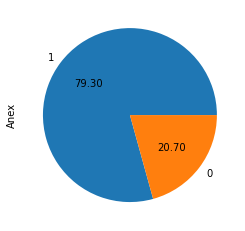

In [12]:
y['Anex'].value_counts().plot.pie(autopct = '%.2f')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.9)

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

In [16]:
classifier = svm.SVC(kernel='linear', gamma = 'auto', C=1)
classifier.fit(X_train_new, y_train_new)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma='auto', kernel='linear')

In [17]:
y_predict = classifier.predict(X_test)

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       182
           1       0.99      0.98      0.98       692

    accuracy                           0.98       874
   macro avg       0.96      0.97      0.96       874
weighted avg       0.98      0.98      0.98       874

